In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('global-cancer-dataset.csv')
data.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [3]:
data.shape

(50000, 15)

In [4]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

### Missing Values

In [6]:
data.duplicated().sum()

0

### Descriptive Analysis

### Plotting for age column

In [9]:
data['Age']

0        71
1        34
2        80
3        40
4        43
         ..
49995    80
49996    40
49997    74
49998    21
49999    22
Name: Age, Length: 50000, dtype: int64

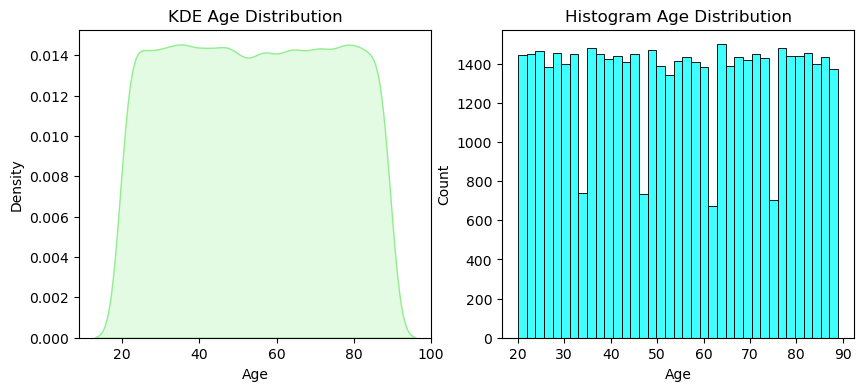

In [17]:
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
sns.kdeplot(data['Age'], fill=True , color ='lightgreen')
plt.title('KDE Age Distribution')


plt.subplot(1,2,2)
sns.histplot(data['Age'],fill=True, color = "cyan")
plt.title('Histogram Age Distribution')

plt.show()

In [18]:
data['Age'].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

In [19]:
data['Age'].skew()

0.0028724371895543672

### Inference 

Range : 20 to 89 year 

Mean age : 54.42 years 

std : 20.22 

IQR : 37(Q1) to 72(Q3)

This suggest a broad representation of both young and elderly patients in the dataset , which supports age-based camparative analysis 

### Gender column

In [20]:
data['Gender'].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

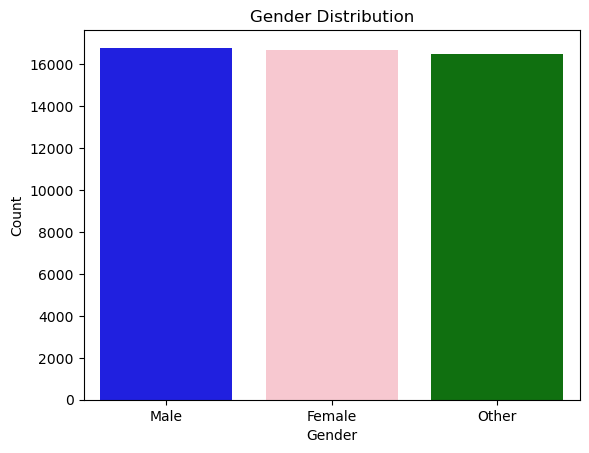

In [22]:
sns.barplot(x=data['Gender'].value_counts().index,y=data['Gender'].value_counts().values,palette=['blue','pink','green'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count') 
plt.show()

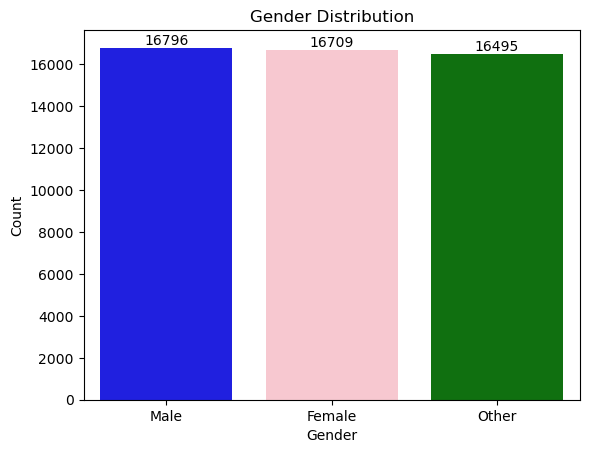

In [25]:
sns.barplot(x=data['Gender'].value_counts().index,y=data['Gender'].value_counts().values,palette=['blue','pink','green'])

for i,v in enumerate(data['Gender'].value_counts()):
    plt.text(i, v + 5 , str(v), ha='center' , va = 'bottom')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count') 
plt.show()

Inference

The dataset contains three gender categories (Male,Female,Other) with the most commom being Male 
Gender distribution is sufficient for evaluating gender specific survival trends and severity outcomes 

### Countries Column 

In [27]:
data['Country_Region'].value_counts()

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

In [28]:
country_count = data['Country_Region'].value_counts()

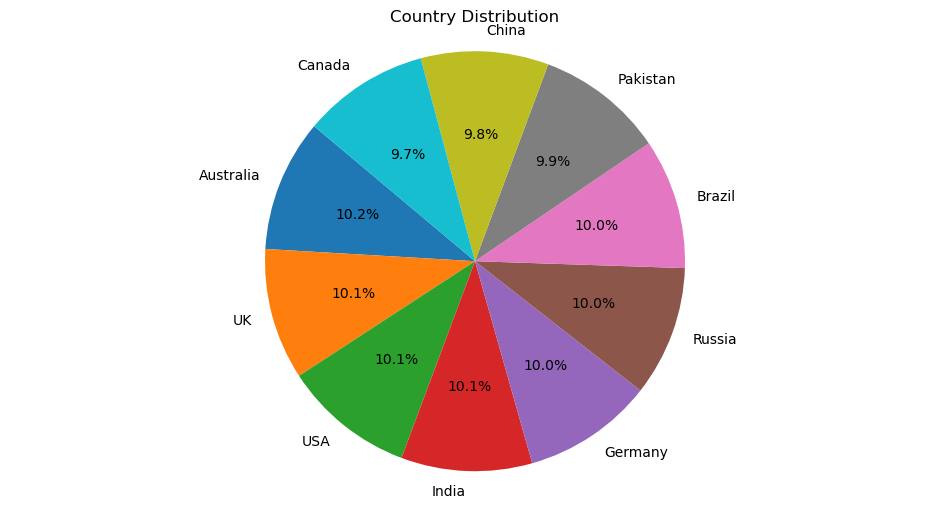

In [29]:
plt.figure(figsize=(12,6))
plt.pie(country_count, labels=country_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Country Distribution')
plt.axis('equal')
plt.show()

Inference 

Patient come from 10 different countries with Australia being the most represented (5092 patients)
This diversity enables cross-country camparison of cancer outcomes and treatment economic .  


### Cancer Type Column 

In [31]:
data['Cancer_Type'].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

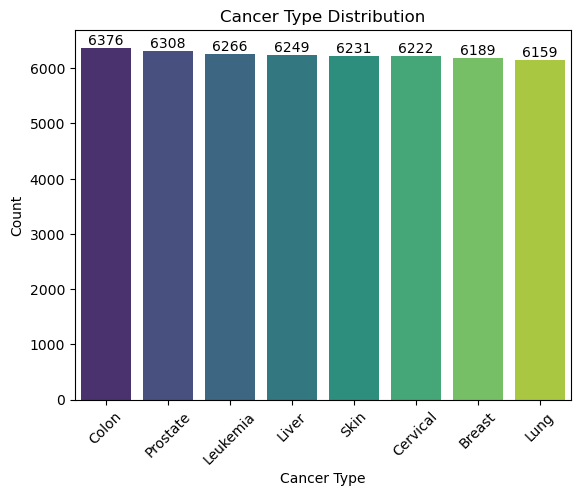

In [33]:
sns.barplot(x=data['Cancer_Type'].value_counts().index, y=data['Cancer_Type'].value_counts().values, palette='viridis')

for i, v in enumerate(data['Cancer_Type'].value_counts()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.title('Cancer Type Distribution')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

inference 

we have in ttoal 8 types of cancer , with each cancer having approx same number of data pointd 
under the label , most common cancers are colon followed by Prostate cancer . 

### Cancer Stage

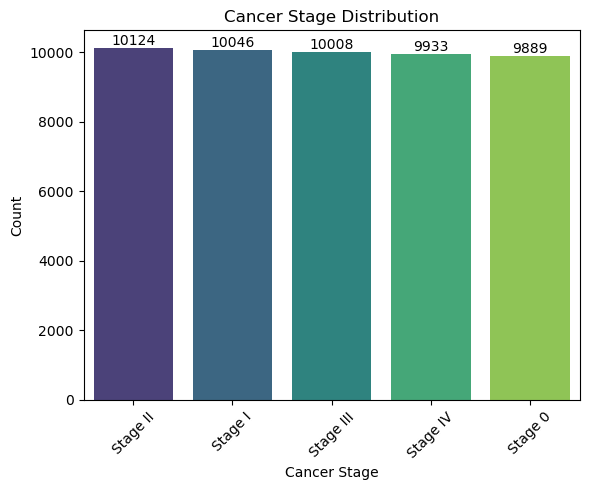

In [34]:
sns.barplot(x=data['Cancer_Stage'].value_counts().index, y=data['Cancer_Stage'].value_counts().values, palette='viridis')

for i, v in enumerate(data['Cancer_Stage'].value_counts()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.title('Cancer Stage Distribution')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Inference 

This column is ordinal as there are five stages in cancer where 4 is the most lethal 
values ranging from 0 to 4 with stage 2 being the most common one and each stage almost have same 
number of data points 

### Treatment_Cost_USD

In [35]:
data['Treatment_Cost_USD']

0        62913.44
1        12573.41
2         6984.33
3        67446.25
4        77977.12
           ...   
49995    71463.70
49996    49619.66
49997     5338.25
49998    45100.47
49999    64023.82
Name: Treatment_Cost_USD, Length: 50000, dtype: float64

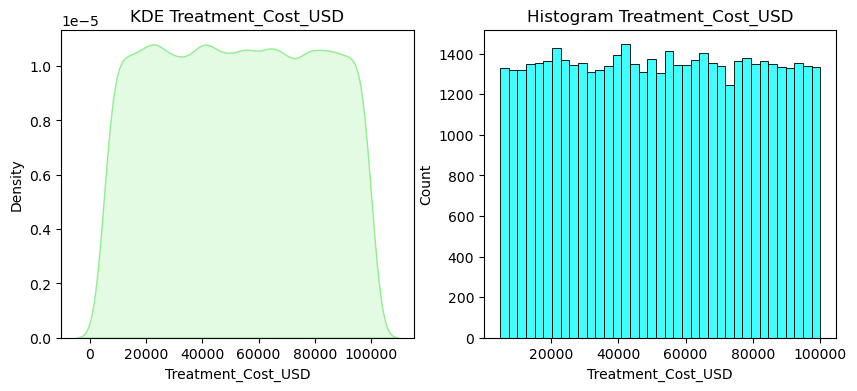

In [36]:
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
sns.kdeplot(data['Treatment_Cost_USD'], fill=True , color ='lightgreen')
plt.title('KDE Treatment_Cost_USD')


plt.subplot(1,2,2)
sns.histplot(data['Treatment_Cost_USD'],fill=True, color = "cyan")
plt.title('Histogram Treatment_Cost_USD')

plt.show()

In [37]:
data['Treatment_Cost_USD'].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

In [38]:
data['Treatment_Cost_USD'].skew()

0.004063624207520141

### Analyzing the Risk Factors

In [39]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [40]:
columns_of_interest = ['Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

In [41]:
data_filtered = data[columns_of_interest]

In [42]:
data_filtered.head()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
0,6.4,2.8,9.5,0.9,8.7
1,1.3,4.5,3.7,3.9,6.3
2,7.4,7.9,2.4,4.7,0.1
3,1.7,2.9,4.8,3.5,2.7
4,5.1,2.8,2.3,6.7,0.5


In [43]:
data_filtered.describe()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,2.500000,2.500000,2.500000,2.500000
50%,5.000000,5.000000,5.000000,5.000000,5.000000
75%,7.500000,7.500000,7.500000,7.500000,7.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000


Inference 

These variables have nearly identical means and std , indicating they were likely designed on the same standardized scale . They are essential in studying interaction effects (Eg genetic risk x smoking ) on survival

##  Determine the relationship between risk factors and cancer severity

In [45]:
risk_factors = ['Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

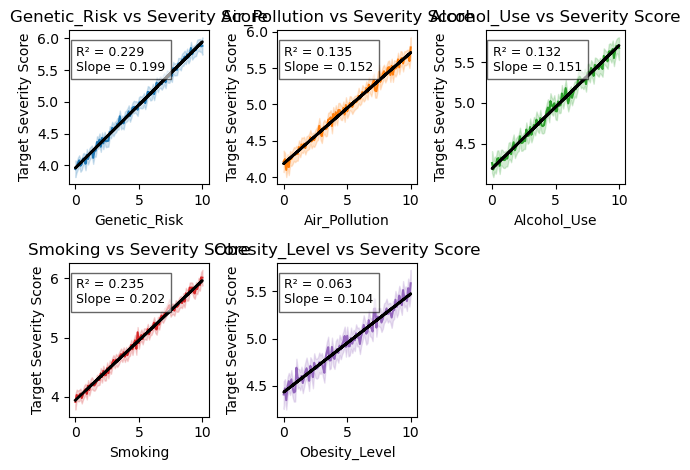

In [58]:
from scipy.stats import linregress

titles = ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']


for i , (factor, title, color) in enumerate(zip(risk_factors, titles , colors),1):
    plt.subplot(2,3,i)
    x= data[factor]
    y = data['Target_Severity_Score']
    slope ,intercept, r_value,p_value , std_err = linregress(x,y)
    r_squared = r_value**2
    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)
    plt.plot(x,x*slope+intercept, color="black", linewidth=2, label="Regression Line")
    plt.title(f"{title} vs Severity Score")
    plt.text(0.05, 0.9, f"R² = {r_squared:.3f}\nSlope = {slope:.3f}",
         transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
    plt.xlabel(factor)
    plt.ylabel("Target Severity Score")
    # plt.legend()



plt.tight_layout()
plt.show()





In [49]:
for i , (factor, title, color) in enumerate(zip(risk_factors, titles , colors)):
    print(f"Processing {title} with color {color} {i}")

Processing Genetic_Risk with color #1f77b4 0
Processing Air_Pollution with color #ff7f0e 1
Processing Alcohol_Use with color #2ca02c 2
Processing Smoking with color #d62728 3
Processing Obesity_Level with color #9467bd 4


In [50]:
for i , (factor, title, color) in enumerate(zip(risk_factors, titles , colors),1):
    print(f"Processing {title} with color {color} {i}")

Processing Genetic_Risk with color #1f77b4 1
Processing Air_Pollution with color #ff7f0e 2
Processing Alcohol_Use with color #2ca02c 3
Processing Smoking with color #d62728 4
Processing Obesity_Level with color #9467bd 5


### Analyze the proportion of early-stage diagnoses by cancer type

In [59]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [61]:
data['Cancer_Type'].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [62]:
data['Cancer_Stage'].unique()

array(['Stage III', 'Stage 0', 'Stage II', 'Stage I', 'Stage IV'],
      dtype=object)

In [63]:
stage_count = data[data['Cancer_Type'] == 'Lung']['Cancer_Stage'].value_counts()

In [64]:
stage_count

Cancer_Stage
Stage II     1298
Stage IV     1286
Stage III    1208
Stage 0      1185
Stage I      1182
Name: count, dtype: int64

In [65]:
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

In [66]:
early_stage_sum


2367

In [67]:
total_stage_count = stage_count.sum()

In [69]:
proportion = (early_stage_sum / total_stage_count)*100
print(f"Proportion of early-stage lung cancer cases: {proportion}%")

Proportion of early-stage lung cancer cases: 38.43156356551388%


In [70]:
stage_count = data[data['Cancer_Type'] == 'Leukemia']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_stage_count = stage_count.sum()
proportion = (early_stage_sum / total_stage_count)*100
print(f"Proportion of early-stage Leukemia cases: {proportion}%")

Proportion of early-stage Leukemia cases: 39.53080114905841%


In [71]:
stage_count = data[data['Cancer_Type'] == 'Breast']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_stage_count = stage_count.sum()
proportion = (early_stage_sum / total_stage_count)*100
print(f"Proportion of early-stage Breast cancer cases: {proportion}%")

Proportion of early-stage Breast cancer cases: 39.47325900791727%


In [72]:
stage_count = data[data['Cancer_Type'] == 'Colon']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_stage_count = stage_count.sum()
proportion = (early_stage_sum / total_stage_count)*100
print(f"Proportion of early-stage Colon cancer cases: {proportion}%")

Proportion of early-stage Colon cancer cases: 40.41718946047679%


In [73]:
stage_count = data[data['Cancer_Type'] == 'Skin']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_stage_count = stage_count.sum()
proportion = (early_stage_sum / total_stage_count)*100
print(f"Proportion of early-stage Skin cancer cases: {proportion}%")

Proportion of early-stage Skin cancer cases: 40.41084898090194%


In [74]:
stage_count = data[data['Cancer_Type'] == 'Cervical']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_stage_count = stage_count.sum()
proportion = (early_stage_sum / total_stage_count)*100
print(f"Proportion of early-stage Cervical cancer cases: {proportion}%")

Proportion of early-stage Cervical cancer cases: 39.85856637737062%


In [75]:
stage_count = data[data['Cancer_Type'] == 'Prostate']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_stage_count = stage_count.sum()
proportion = (early_stage_sum / total_stage_count)*100
print(f"Proportion of early-stage Prostate cancer cases: {proportion}%")

Proportion of early-stage Prostate cancer cases: 40.187064045656314%


In [76]:
stage_count = data[data['Cancer_Type'] == 'Liver']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)
total_stage_count = stage_count.sum()
proportion = (early_stage_sum / total_stage_count)*100
print(f"Proportion of early-stage Liver cancer cases: {proportion}%")

Proportion of early-stage Liver cancer cases: 40.614498319731155%


### Identify key predictors of cancer severity and survival years.

In [77]:
features= ["Age", 'Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
targets= ["Survival_Years","Target_Severity_Score"]

In [78]:
# correlation 

pearson_corr = data[features + targets].corr(method='pearson')
spearman_corr = data[features + targets].corr(method='spearman')
pearson_corr

,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Survival_Years,Target_Severity_Score
Age,1.000000,0.002229,0.001101,-0.004130,0.001734,-0.002706,-0.000147,-0.001481
Genetic_Risk,0.002229,1.000000,-0.004492,-0.002558,-0.003718,0.003522,0.001708,0.478700
Air_Pollution,0.001101,-0.004492,1.000000,0.003511,0.003549,0.006507,0.000893,0.366963
Alcohol_Use,-0.004130,-0.002558,0.003511,1.000000,-0.002938,0.007425,-0.000527,0.363250
Smoking,0.001734,-0.003718,0.003549,-0.002938,1.000000,0.005828,0.001371,0.484420
Obesity_Level,-0.002706,0.003522,0.006507,0.007425,0.005828,1.000000,0.009771,0.251366
Survival_Years,-0.000147,0.001708,0.000893,-0.000527,0.001371,0.009771,1.000000,0.004161
Target_Severity_Score,-0.001481,0.478700,0.366963,0.363250,0.484420,0.251366,0.004161,1.000000


In [79]:
spearman_corr

,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Survival_Years,Target_Severity_Score
Age,1.000000,0.002207,0.001102,-0.004133,0.001692,-0.002732,-0.000149,-0.002076
Genetic_Risk,0.002207,1.000000,-0.004472,-0.002571,-0.003707,0.003494,0.001684,0.472193
Air_Pollution,0.001102,-0.004472,1.000000,0.003507,0.003561,0.006496,0.000841,0.357528
Alcohol_Use,-0.004133,-0.002571,0.003507,1.000000,-0.002904,0.007401,-0.000543,0.354694
Smoking,0.001692,-0.003707,0.003561,-0.002904,1.000000,0.005838,0.001372,0.477881
Obesity_Level,-0.002732,0.003494,0.006496,0.007401,0.005838,1.000000,0.009780,0.243152
Survival_Years,-0.000149,0.001684,0.000841,-0.000543,0.001372,0.009780,1.000000,0.003431
Target_Severity_Score,-0.002076,0.472193,0.357528,0.354694,0.477881,0.243152,0.003431,1.000000


In [80]:
# slice out only thr relationship with target variables
pearson_results= pearson_corr[targets]
spearman_results=spearman_corr[targets]
#combine both
correlation_df= pd.concat([pearson_results,spearman_results], axis=1, keys=["Pearson","Spearman"])
correlation_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

In [81]:
# using random forest for target severity score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# converting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])


# Preparing X and Y
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Target_Severity_Score"] 


# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)


# train the model
model= RandomForestRegressor(n_estimators=200, max_depth= None , min_samples_split=2,min_samples_leaf=1, random_state=40)
model.fit(X_train_s, y_train_s) 


# evalaute the model
train_r2_severity= r2_score(y_train_s , model.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , model.predict(X_test_s))

In [82]:
print(train_r2_severity)
print(test_r2_severity)

0.9689503792116058
0.7752278237418935


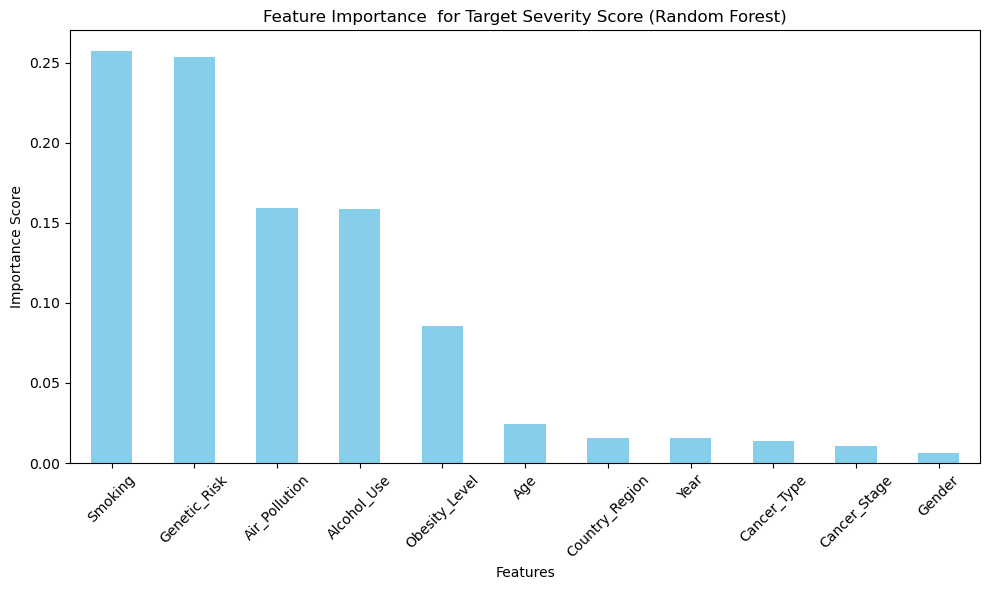

In [83]:
feature_importance_severity =pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False) 
#plotting of important features
plt.figure(figsize=(10,6))
feature_importance_severity.plot(kind="bar", color="skyblue")
plt.title("Feature Importance  for Target Severity Score (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

In [84]:
# using random forest for target severity score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# converting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])


# Preparing X and Y
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Survival_Years"]


# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)


# train the model
model= RandomForestRegressor(n_estimators=200, max_depth= None , min_samples_split=2,min_samples_leaf=1, random_state=40)
model.fit(X_train_s, y_train_s) 


# evalaute the model
train_r2_severity= r2_score(y_train_s , model.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , model.predict(X_test_s))

In [85]:
print(train_r2_severity)
print(test_r2_severity)

0.8596068616548123
-0.016789391036591716


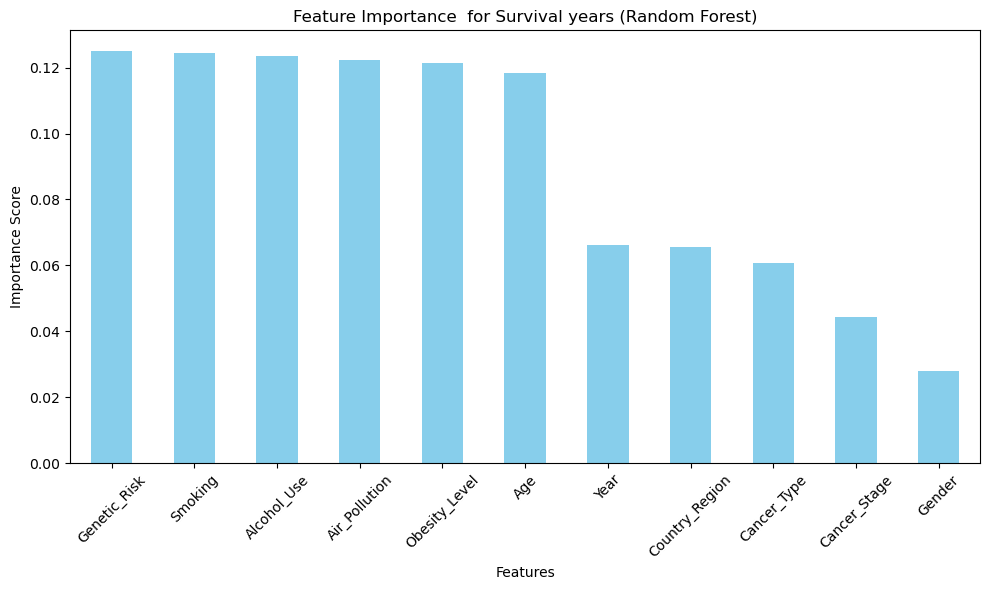

In [86]:
feature_importance_severity =pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False) 
#plotting of important features
plt.figure(figsize=(10,6))
feature_importance_severity.plot(kind="bar", color="skyblue")
plt.title("Feature Importance  for Survival years (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing  features and input
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Survival_Years"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# train the model
model= RandomForestRegressor(random_state=40)
GSC= GridSearchCV(model , param_grid, cv=3, scoring="r2", n_jobs=-1)
GSC.fit(X_train_s, y_train_s)

best_rf_severity= GSC.best_estimator_

# evalaute the model
train_r2_severity= r2_score(y_train_s , best_rf_severity.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , best_rf_severity.predict(X_test_s))



In [89]:
print(train_r2_severity)
print(test_r2_severity)

0.008998065861791305
-0.0003487352301705382


<Axes: xlabel='Survival_Years', ylabel='Count'>

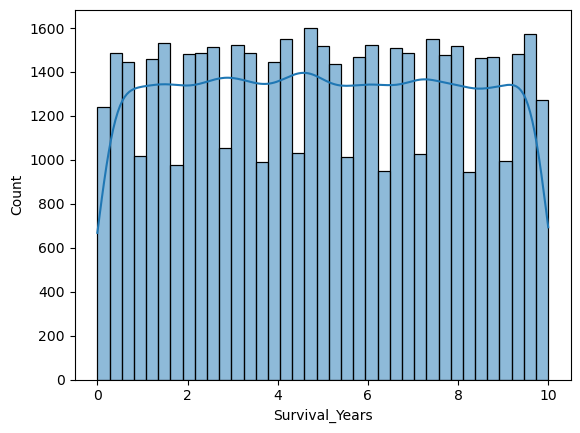

In [90]:
import seaborn as sns
sns.histplot(data["Survival_Years"], kde=True)

In [91]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

Gender                  -0.007121
Cancer_Stage            -0.003014
Cancer_Type             -0.001717
Alcohol_Use             -0.000527
Treatment_Cost_USD      -0.000429
Age                     -0.000147
Year                     0.000018
Air_Pollution            0.000893
Smoking                  0.001371
Genetic_Risk             0.001708
Target_Severity_Score    0.004161
Country_Region           0.005121
Obesity_Level            0.009771
Survival_Years           1.000000
Name: Survival_Years, dtype: float64

### Explore the economic burden of cancer treatment across different demographics and countries

In [92]:
data.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,1,8,2021,6.4,2.8,9.5,0.9,8.7,5,3,62913.44,5.9,4.92
1,PT0000001,34,1,3,2021,1.3,4.5,3.7,3.9,6.3,3,0,12573.41,4.7,4.65
2,PT0000002,80,1,6,2023,7.4,7.9,2.4,4.7,0.1,0,2,6984.33,7.1,5.84
3,PT0000003,40,1,8,2015,1.7,2.9,4.8,3.5,2.7,2,1,67446.25,1.6,3.12
4,PT0000004,43,0,1,2017,5.1,2.8,2.3,6.7,0.5,7,3,77977.12,2.9,3.62


In [93]:
data = pd.read_csv('global-cancer-dataset.csv')
data.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [94]:
df = data.copy()

In [95]:
df.groupby(['Country_Region','Gender'])['Treatment_Cost_USD'].mean().reset_index()

,Country_Region,Gender,Treatment_Cost_USD
0,Australia,Female,52301.781302
1,Australia,Male,52928.509540
2,Australia,Other,52629.969316
3,Brazil,Female,52484.894936
4,Brazil,Male,52937.613970
5,Brazil,Other,52186.267723
6,Canada,Female,52358.507421
7,Canada,Male,52846.880795
8,Canada,Other,52559.389020
9,China,Female,52438.973622


In [97]:
data['Age_group'] = pd.cut(data['Age'], bins=[0, 30, 45, 60, 75, 90], labels=['0-30', '31-45', '46-60', '61-75', '76-90'])

In [98]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76-90
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,76-90
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,31-45
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,61-75
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,0-30


In [102]:
country_agegroup_cost = data.groupby(['Country_Region','Age_group','Gender'])['Treatment_Cost_USD'].mean().reset_index()

In [103]:
country_agegroup_cost

,Country_Region,Age_group,Gender,Treatment_Cost_USD
0,Australia,0-30,Female,53287.701319
1,Australia,0-30,Male,52939.875035
2,Australia,0-30,Other,53776.208452
3,Australia,31-45,Female,51647.694000
4,Australia,31-45,Male,54212.453438
...,...,...,...,...
145,USA,61-75,Male,55381.892304
146,USA,61-75,Other,52070.474766
147,USA,76-90,Female,51877.032768
148,USA,76-90,Male,52445.346342


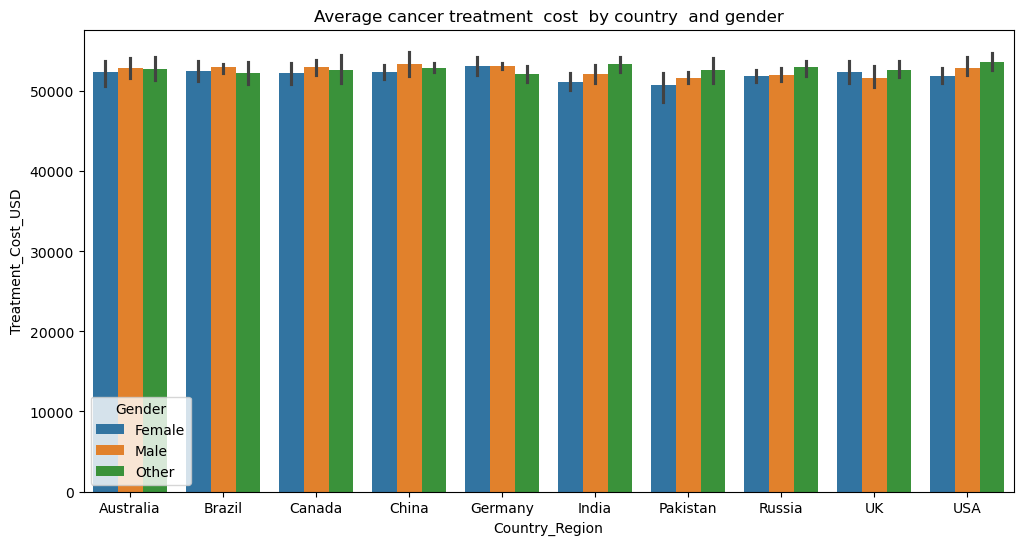

In [105]:
plt.figure(figsize=(12,6))
sns.barplot(data=country_agegroup_cost, x='Country_Region', y='Treatment_Cost_USD', hue='Gender')
plt.title("Average cancer treatment  cost  by country  and gender")
plt.show()

In [107]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76-90
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,76-90
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,31-45
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,61-75
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,0-30


In [108]:
country_age_cost= data.groupby(["Country_Region", "Age_group"])["Treatment_Cost_USD"].mean().reset_index()

In [109]:
country_age_cost

,Country_Region,Age_group,Treatment_Cost_USD
0,Australia,0-30,53315.916090
1,Australia,31-45,52290.210149
2,Australia,46-60,50887.310424
3,Australia,61-75,51827.812279
4,Australia,76-90,54922.283170
5,Brazil,0-30,53814.974610
6,Brazil,31-45,53178.611181
7,Brazil,46-60,52650.893070
8,Brazil,61-75,51854.086124
9,Brazil,76-90,51448.451094


In [111]:
heatmap_data= country_age_cost.pivot(index="Age_group", columns="Country_Region", values="Treatment_Cost_USD")

In [112]:
heatmap_data

Country_Region,Australia,Brazil,Canada,China,Germany,India,Pakistan,Russia,UK,USA
Age_group,,,,,,,,,,
0-30,53315.916090,53814.974610,52583.063081,53168.658869,53516.512180,51184.896086,53619.596628,51624.377309,52142.675841,52519.910333
31-45,52290.210149,53178.611181,53055.260081,51782.313638,53350.239752,50724.862964,49657.497105,52282.727465,51060.567452,53709.716187
46-60,50887.310424,52650.893070,52579.183330,53075.659509,53107.842802,52947.842856,51376.446424,52157.620660,51870.619927,51406.817357
61-75,51827.812279,51854.086124,52123.439015,53438.460704,52340.634559,53356.624661,51462.986816,52457.635951,53248.228373,53480.698907
76-90,54922.283170,51448.451094,52561.921587,53109.919351,51770.285168,52937.552968,52262.875575,52925.335015,52692.972380,53126.174016


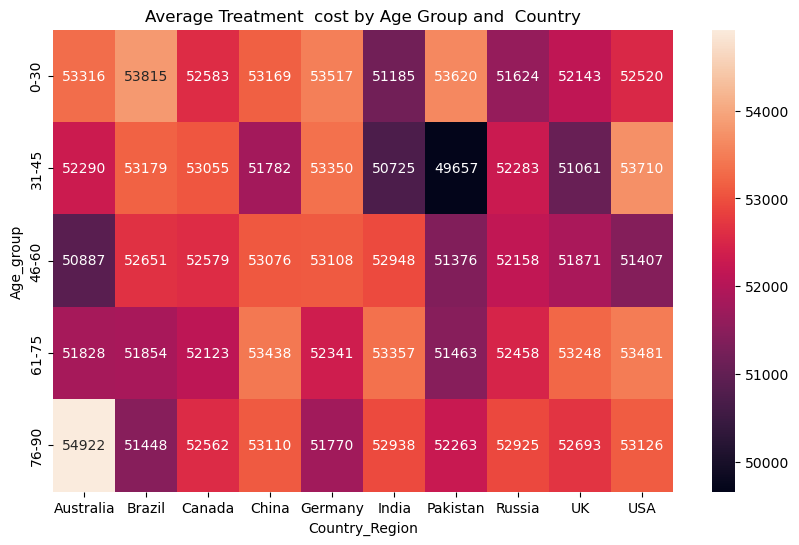

In [113]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Average Treatment  cost by Age Group and  Country")
plt.show()

### Assess whether higher treatment cost is associated with longer survival

In [114]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score', 'Age_group'],
      dtype='object')

Null Hypothesis (H0) : There is no correlation between treatment cost and survivl years
Alternative hypothesis (H1) : There is a correlation (positive or negative) between treatment cost and survival years.

In [115]:
from scipy.stats  import pearsonr, spearmanr

x= data["Treatment_Cost_USD"]
y= data["Survival_Years"]

# performing pearson correlation test
pearson_corr, pearson_p = pearsonr(x,y)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-Value : {pearson_p}") 

# Spearman correlation test
spearman_corr, spearman_p = spearmanr(x,y)
print(f"spearman Correlation Coefficient: {spearman_corr}")
print(f"spearman P-Value : {spearman_p}") 

alpha=0.05 

def interpret_corr(corr, p, method):
    if p<alpha:
        print(f"{method}, we  reject thr hull hypothesis")
    else:
        print(f"{method}, we failed to reject null hypothesis") 


interpret_corr(pearson_corr,pearson_p,"Pearson")
interpret_corr(spearman_corr,spearman_p,"Spearman")        

Pearson Correlation Coefficient: -0.0004294054283021486
Pearson P-Value : 0.9235082012963326
spearman Correlation Coefficient: -0.0004454737292549569
spearman P-Value : 0.9206551702014918
Pearson, we failed to reject null hypothesis
Spearman, we failed to reject null hypothesis


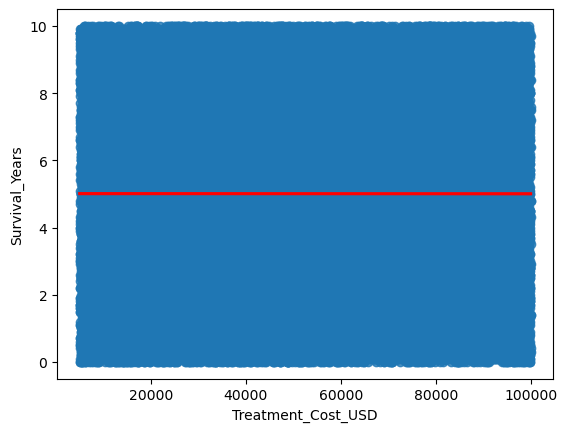

In [116]:
sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

### Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [117]:
data.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76-90
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45


In [118]:
df= data.copy()

In [119]:
df['Cancer_Stage'].unique()

array(['Stage III', 'Stage 0', 'Stage II', 'Stage I', 'Stage IV'],
      dtype=object)

In [120]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

In [124]:
grouped_stats = df.groupby('Cancer_Stage')[['Treatment_Cost_USD','Survival_Years']].mean().reset_index()

In [125]:
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


In [126]:
grouped_costs=[]
grouped_survival=[] 

for  stage in stage_order:
    stage_data= df[df["Cancer_Stage"]==stage]
    cost= stage_data["Treatment_Cost_USD"]
    survival= stage_data["Survival_Years"]
    grouped_costs.append(cost)
    grouped_survival.append(survival)

In [127]:
len(grouped_costs)

5

In [128]:
len(grouped_survival)

5

In [129]:
grouped_survival

[1        4.7
 6        1.0
 17       1.9
 22       9.9
 29       0.2
         ... 
 49988    4.7
 49989    2.2
 49995    1.0
 49997    2.7
 49999    7.4
 Name: Survival_Years, Length: 9889, dtype: float64,
 3        1.6
 7        6.2
 10       1.0
 11       6.0
 19       5.4
         ... 
 49979    5.7
 49981    7.6
 49987    7.5
 49993    4.2
 49996    0.4
 Name: Survival_Years, Length: 10046, dtype: float64,
 2        7.1
 8        6.5
 9        5.7
 12       8.0
 13       7.1
         ... 
 49973    1.3
 49978    0.9
 49990    1.1
 49991    9.5
 49992    9.3
 Name: Survival_Years, Length: 10124, dtype: float64,
 0        5.9
 4        2.9
 16       0.5
 28       9.7
 31       9.8
         ... 
 49968    4.9
 49976    4.2
 49980    6.0
 49983    0.7
 49994    3.0
 Name: Survival_Years, Length: 10008, dtype: float64,
 5        9.5
 14       8.3
 30       5.1
 33       5.5
 34       3.8
         ... 
 49972    9.9
 49982    7.5
 49984    9.1
 49985    7.4
 49998    7.5
 Name: Survival

In [130]:
# check for normaility
from scipy.stats import  shapiro, f_oneway
normal_cost=0
normal_survival=0

for i in range (len(stage_order)):
    cost_p= shapiro(grouped_costs[i]).pvalue
    surv_p= shapiro(grouped_survival[i]).pvalue 
    print(f" cost {cost_p} for group {i}")
    print(f"Survival {surv_p} for group {i}")
    if cost_p<0.05:
        normal_cost+=1
    if surv_p<0.05:
        normal_survival+=1

 cost 1.5471821061637387e-47 for group 0
Survival 1.6291039522109283e-47 for group 0
 cost 7.306523956950957e-48 for group 1
Survival 7.575551046259697e-48 for group 1
 cost 8.943579643043388e-48 for group 2
Survival 4.041659465829829e-48 for group 2
 cost 5.267270033022367e-48 for group 3
Survival 1.3648520457944784e-47 for group 3
 cost 1.5838640189581322e-47 for group 4
Survival 2.2992598289836786e-47 for group 4


In [131]:
print(normal_cost)
print(normal_survival)

5
5


In [132]:
from scipy.stats import kruskal
kusrkal_cost =kruskal(*grouped_costs)
kurkal_survival= kruskal(*grouped_survival)

p_cost= kusrkal_cost.pvalue
p_survival= kurkal_survival.pvalue


In [133]:
p_cost

0.4254451689062656

In [134]:
p_survival

0.6033078729984223

### Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity


In [135]:
import statsmodels.formula.api as smf 

model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking", data=data).fit()

model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:              OLS                   Adj. R-squared:     0.466      
Dependent Variable: Target_Severity_Score AIC:                128780.2176
Date:               2025-09-02 19:06      BIC:                128815.4967
No. Observations:   50000                 Log-Likelihood:     -64386.    
Df Model:           3                     F-statistic:        1.452e+04  
Df Residuals:       49996                 Prob (F-statistic): 0.00       
R-squared:          0.466                 Scale:              0.76924    
--------------------------------------------------------------------------
                       Coef.   Std.Err.     t      P>|t|    [0.025  0.975]
--------------------------------------------------------------------------
Intercept              2.9363    0.0157  187.0523  0.0000   2.9056  2.9671
Genetic_Risk           0.2009    0.0027   74.1303  0.0000   0.1956  0.2062
Smoking                0.2036    0.0027   74.7710  0.0000   0.1982  0.2089
Genetic_Risk:Smoking  -0.0002    0.0005   -0.4842  0.6283  -0.0012  0.0007
-------------------------------------------------------------------------
Omnibus:                353.462         Durbin-Watson:            1.998  
Prob(Omnibus):          0.000           Jarque-Bera (JB):         240.715
Skew:                   -0.004          Prob(JB):                 0.000  
Kurtosis:               2.660           Condition No.:            139    
=========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

In [136]:
model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

Coef.      -0.000228
Std.Err.    0.000471
t          -0.484187
P>|t|       0.628255
[0.025     -0.001150
0.975]      0.000694
Name: Genetic_Risk:Smoking, dtype: float64

In [137]:
p_value = 0.628255